In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv("FinancialMarketData.csv")

In [4]:
df

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.2600,100.560,105.86,1.6460,25.77,...,116.4640,230.527,123.7620,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.0100,101.860,105.47,1.6380,28.85,...,117.2670,231.377,123.7620,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.2400,102.410,106.04,1.6500,28.28,...,117.9950,232.390,123.7620,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.8500,104.920,107.85,1.6110,28.22,...,120.5100,231.942,122.3280,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.4300,104.220,109.30,1.6110,28.02,...,118.7910,237.812,122.3280,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,3/23/2021,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,...,427.7972,1249.403,389.8500,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83
1107,0,3/30/2021,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,...,428.6578,1242.264,385.8145,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80
1108,0,4/6/2021,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,...,430.6649,1250.256,390.6819,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92
1109,0,4/13/2021,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,...,430.4087,1252.563,390.3848,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40


In [5]:
df.head()

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [6]:
df.describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.213321,987.463744,0.036153,2259.860486,245.247670,90.934982,106.605734,1.569661,60.708101,19.992169,...,232.109985,704.379545,259.052717,1606.997102,107.877138,784.846292,1903.216436,648.681377,693.156616,53.933159
std,0.409837,494.623740,0.349453,2017.811888,68.278066,11.379095,12.840754,0.212344,25.900813,8.642157,...,109.917628,309.951757,75.934451,698.481956,20.795973,200.076443,986.468254,299.096020,405.527014,24.738356
min,0.000000,256.680000,-0.974000,291.000000,106.293000,71.329000,75.940000,1.172000,10.010000,9.430000,...,80.797000,230.527000,121.331000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,0.000000,433.740000,-0.191000,990.000000,184.705550,81.240500,101.565000,1.418000,39.625000,13.640000,...,131.025000,434.661000,205.315500,1103.925000,90.605000,601.615000,1042.645000,463.195000,278.385000,28.565000
50%,0.000000,1137.800000,0.035000,1518.000000,234.560000,89.716000,108.720000,1.562000,57.400000,17.980000,...,213.205000,714.807000,264.770000,1324.430000,111.320000,786.830000,1860.960000,612.930000,691.530000,58.740000
75%,0.000000,1324.825000,0.260500,2685.500000,301.539500,97.404000,116.220000,1.677500,79.640000,23.625000,...,342.884500,939.824500,320.753000,1992.445000,126.470000,965.875000,2533.770000,793.620000,1014.750000,68.460000
max,1.000000,2006.910000,0.991000,11793.000000,467.570000,119.820000,134.630000,2.085000,140.970000,75.910000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


In [7]:
df[df['Y'] == 0].describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,874.0,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,...,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,0.0,990.433593,0.052664,2347.495423,247.881169,90.323585,107.616281,1.579962,61.653707,17.300263,...,244.111644,731.721141,265.240222,1677.502025,110.625195,813.943009,1925.515492,671.854016,733.038192,55.859222
std,0.0,472.840491,0.335677,2014.431535,66.348132,10.483254,11.547186,0.221348,24.492175,5.194502,...,109.666432,306.805151,73.623324,699.762950,19.452209,190.909211,954.034630,286.306596,409.243710,24.792759
min,0.0,257.100000,-0.873000,291.000000,129.574000,71.329000,76.720000,1.206000,18.080000,9.430000,...,81.986000,230.527000,121.331000,787.160000,63.760000,443.820000,326.720000,161.560000,125.810000,13.720000
25%,0.0,448.992500,-0.173750,1019.000000,186.208000,81.486750,102.810000,1.401500,44.560000,13.120000,...,143.396250,457.186750,206.406000,1130.237500,94.155000,660.890000,1148.162500,493.902500,318.342500,30.380000
50%,0.0,1177.875000,0.041000,1587.000000,250.235000,89.825000,109.025000,1.574500,58.350000,16.010000,...,229.733500,733.677500,275.520000,1391.480000,113.575000,814.240000,1876.695000,626.105000,730.030000,60.735000
75%,0.0,1314.617500,0.251250,2959.250000,301.856500,96.734750,115.855000,1.742750,78.157500,20.747500,...,348.385250,1003.778750,323.490000,2037.430000,127.905000,977.975000,2424.240000,803.947500,1052.482500,70.410000
max,0.0,2006.910000,0.991000,11793.000000,449.490000,119.820000,134.630000,2.068000,138.740000,32.880000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


In [8]:
df[df['Y'] == 1].describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,1.0,976.511646,-0.024734,1936.683544,235.535947,93.189671,102.879072,1.531673,57.220928,29.919283,...,187.850703,603.550203,236.234658,1346.991603,97.742954,677.544473,1820.982785,563.226160,546.082785,46.830295
std,0.0,568.765356,0.390920,2001.477121,74.312577,13.999697,16.265108,0.170275,30.343985,11.210110,...,99.179127,301.127765,80.027618,630.095194,22.433593,196.878357,1096.095815,328.954032,355.435302,23.242389
min,1.0,256.680000,-0.974000,345.000000,106.293000,72.369000,75.940000,1.172000,10.010000,13.710000,...,80.797000,237.812000,122.002000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,1.0,317.050000,-0.289000,971.000000,173.740000,80.899000,89.870000,1.442000,29.480000,21.910000,...,106.475000,278.383000,144.784000,973.590000,80.820000,504.330000,768.910000,272.040000,177.450000,25.410000
50%,1.0,901.750000,-0.013000,1366.000000,215.880000,87.581000,107.340000,1.533000,45.940000,27.050000,...,150.307000,554.560000,247.689000,1193.170000,92.830000,616.170000,1711.270000,533.560000,589.570000,52.290000
75%,1.0,1601.320000,0.285000,1795.000000,297.170000,106.800000,117.280000,1.585000,86.890000,35.080000,...,239.939000,810.849000,302.006000,1351.480000,117.180000,852.730000,2807.800000,767.290000,707.360000,59.980000
max,1.0,1975.060000,0.869000,11039.000000,467.570000,119.620000,133.940000,2.085000,140.970000,75.910000,...,418.688000,1252.322000,387.906500,3414.210000,144.000000,1082.580000,4430.990000,1562.150000,1395.800000,104.220000


In [9]:
# Select all columns with numeric data types (integers and floats) and store them in a new DataFrame called 'numeric_df'.
numeric_df = df.select_dtypes(include=[np.number])
# Calculate the correlation between all pairs of numeric columns in 'numeric_df'.
numeric_df.corr()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
Y,1.000000,-0.011535,-0.090772,-0.083440,-0.074102,0.103227,-0.151197,-0.093201,-0.070141,0.598432,...,-0.209774,-0.169475,-0.156550,-0.193928,-0.253877,-0.279399,-0.043429,-0.148848,-0.188942,-0.149581
XAU BGNL,-0.011535,1.000000,0.114798,-0.315007,0.015316,-0.428891,-0.576191,-0.422084,0.515215,-0.075873,...,0.817990,0.891486,0.925465,0.625814,0.176177,0.036654,0.581667,0.339929,0.831756,0.829659
ECSURPUS,-0.090772,0.114798,1.000000,-0.102022,-0.139779,0.074835,-0.070422,-0.188233,-0.016245,-0.094127,...,0.115747,0.110335,0.073268,0.192180,0.014535,0.034829,-0.014098,-0.077750,0.102198,0.115145
BDIY,-0.083440,-0.315007,-0.102022,1.000000,0.596182,-0.441793,0.062822,0.756718,0.286396,-0.045367,...,-0.410941,-0.350372,-0.241704,-0.300277,-0.058349,0.103124,0.337489,0.606526,-0.240799,-0.033084
CRY,-0.074102,0.015316,-0.139779,0.596182,1.000000,-0.798564,-0.412364,0.793954,0.785614,-0.190060,...,-0.315491,-0.218547,-0.045101,-0.458623,-0.261605,-0.235202,0.641511,0.761661,-0.210901,-0.031605
DXY,0.103227,-0.428891,0.074835,-0.441793,-0.798564,1.000000,0.650429,-0.544966,-0.816378,0.115712,...,-0.074069,-0.201703,-0.386866,0.144988,0.300674,0.247446,-0.776353,-0.756141,-0.188670,-0.352379
JPY,-0.151197,-0.576191,-0.070422,0.062822,-0.412364,0.650429,1.000000,-0.008633,-0.608209,-0.134791,...,-0.113902,-0.225936,-0.330176,0.115772,0.392934,0.557078,-0.639573,-0.306819,-0.149469,-0.269353
GBP,-0.093201,-0.422084,-0.188233,0.756718,0.793954,-0.544966,-0.008633,1.000000,0.352787,-0.124496,...,-0.598572,-0.549016,-0.402361,-0.594595,-0.246342,-0.113736,0.224720,0.530964,-0.501925,-0.329350
Cl1,-0.070141,0.515215,-0.016245,0.286396,0.785614,-0.816378,-0.608209,0.352787,1.000000,-0.213999,...,0.196312,0.292426,0.438823,-0.029697,-0.062125,-0.160278,0.861036,0.759998,0.284056,0.430908
VIX,0.598432,-0.075873,-0.094127,-0.045367,-0.190060,0.115712,-0.134791,-0.124496,-0.213999,1.000000,...,-0.310635,-0.253247,-0.227376,-0.239029,-0.421996,-0.367709,-0.098962,-0.247953,-0.243126,-0.164591


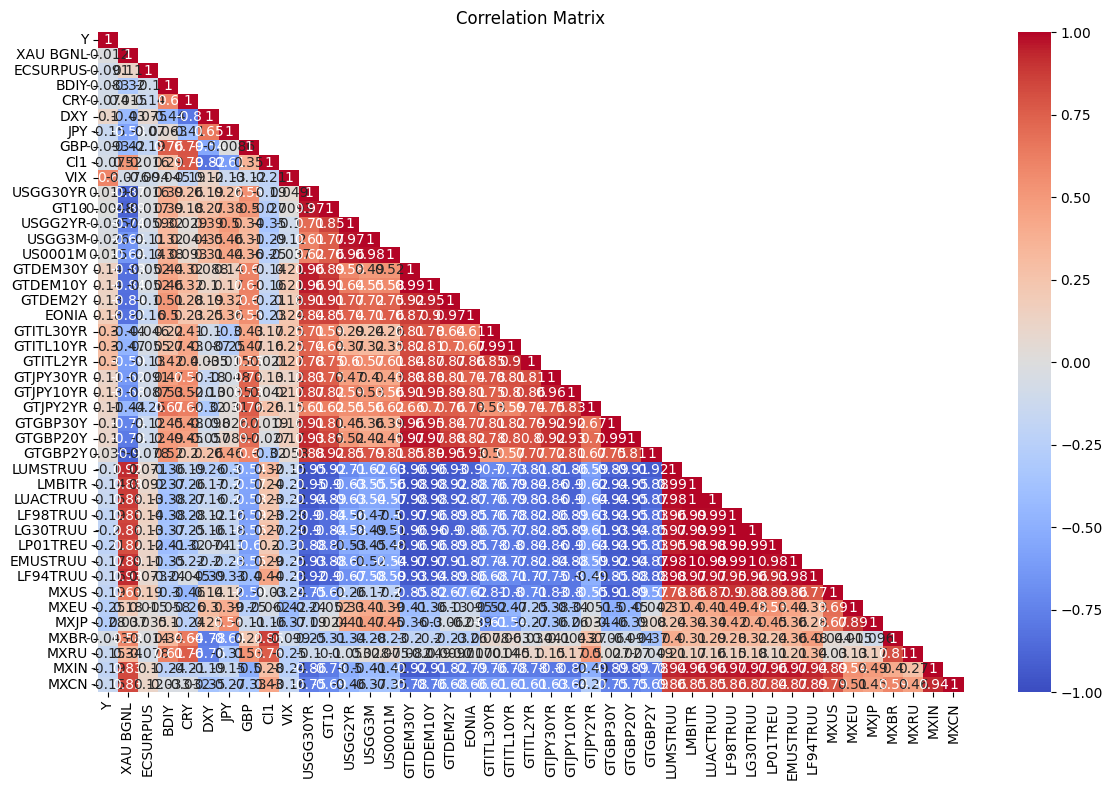

In [10]:
#Get the correlation matrix
corr_matrix = numeric_df.corr()

#Get the upper triangle of the correlation matrix to avoid duplicates
upper_triangle = np.triu(corr_matrix)

#Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix), k=1)

#Set up the matplotlib figure
plt.figure(figsize=(12, 8))

#Create headmpa using seaborn
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

#Show the plot
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [11]:
correlations = numeric_df.corr()['Y'].sort_values(ascending=False)
print("Top feature correlations with target")
print(correlations)

Top feature correlations with target
Y            1.000000
VIX          0.598432
GTITL2YR     0.304528
GTITL10YR    0.297573
GTITL30YR    0.295000
EONIA        0.180311
GTDEM30Y     0.141537
GTDEM10Y     0.139933
GTJPY10YR    0.133660
GTDEM2Y      0.130607
GTJPY30YR    0.114555
GTJPY2YR     0.112314
DXY          0.103227
GTGBP20Y     0.100142
GTGBP30Y     0.099777
GTGBP2Y      0.035010
USGG30YR     0.019255
US0001M      0.015379
GT10        -0.004776
XAU BGNL    -0.011535
USGG3M      -0.025935
USGG2YR     -0.034909
MXBR        -0.043429
Cl1         -0.070141
CRY         -0.074102
BDIY        -0.083440
ECSURPUS    -0.090772
GBP         -0.093201
LUMSTRUU    -0.104897
LMBITR      -0.143607
MXRU        -0.148848
MXCN        -0.149581
JPY         -0.151197
LUACTRUU    -0.153544
LF94TRUU    -0.156550
EMUSTRUU    -0.169475
MXIN        -0.188942
LF98TRUU    -0.189661
MXUS        -0.193928
LG30TRUU    -0.197232
LP01TREU    -0.209774
MXEU        -0.253877
MXJP        -0.279399
Name: Y, dtype: f

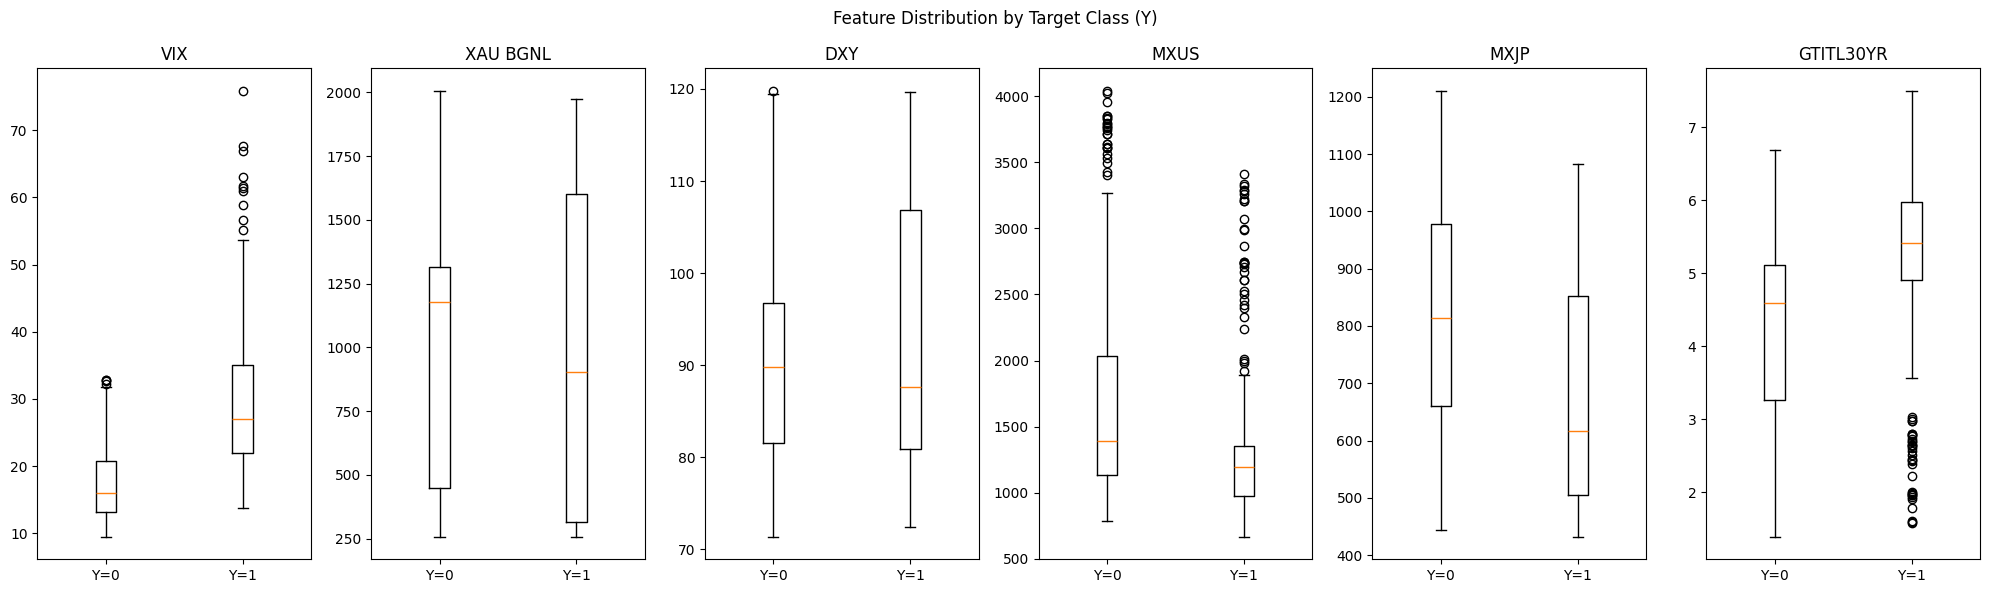

In [12]:
# Select specific columns for comparison and visualization.
# These columns are likely features of interest in the dataset.
cols_to_plot = ["VIX", 'XAU BGNL', 'DXY', 'MXUS', 'MXJP', 'GTITL30YR']

# Create a figure and subplots to display multiple box plots.
# 1 row of subplots, with the number of subplots equal to the number of selected columns.
# figsize sets the dimensions of the figure.
fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 6))
fig.suptitle("Feature Distribution by Target Class (Y)") #add subtitle for the figure

# Iterate through the selected columns and create box plots for each.
for i, col in enumerate(cols_to_plot):
    # Prepare data for the box plot:
    # - df[df["Y"] == 0][col]: Data for the feature 'col' where the target variable "Y" is 0.
    # - df[df["Y"] == 1][col]: Data for the feature 'col' where the target variable "Y" is 1.
    data = [df[df["Y"] == 0][col], df[df["Y"] == 1][col]]

    # Create the box plot on the current subplot (axes[i]).
    # 'data' provides the data for the plot.
    # 'labels' sets the labels for the boxes (Y=0 and Y=1).
    axes[i].boxplot(data, labels=["Y=0", "Y=1"])

    # Set the title of the subplot to the current column name.
    axes[i].set_title(col)

    # Rotate x-axis labels for better readability (if needed).
    axes[i].tick_params(axis="x", rotation=0)

# Adjust subplot layout to prevent overlapping.
plt.tight_layout()

# Display the plot.
plt.show() # Moved outside the loop

<Figure size 2000x600 with 0 Axes>

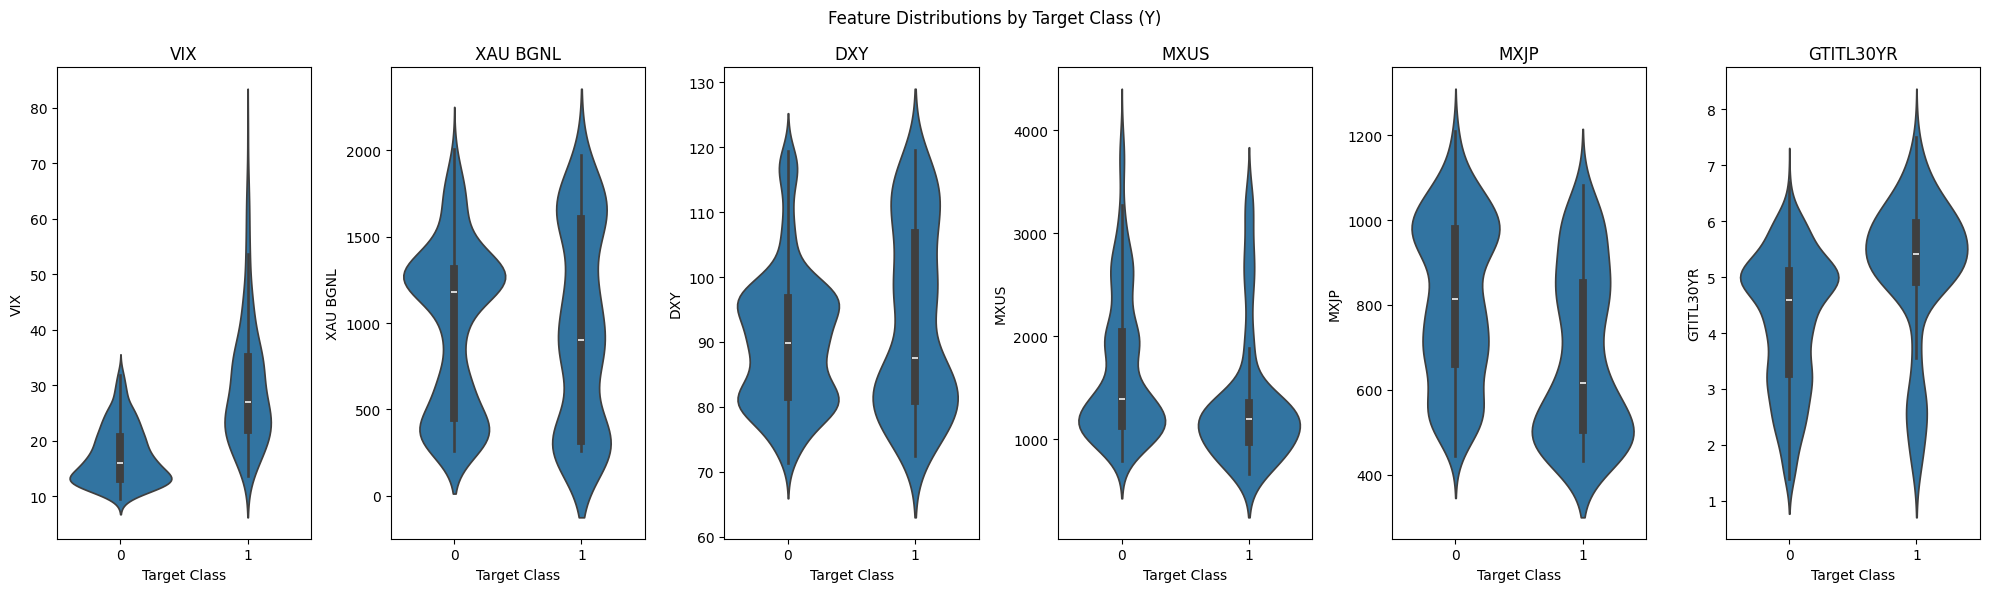

In [13]:
# Create violine plots for feature distribution comparison
plt.figure(figsize=(20,6)) # Create a figure with a specific size (20x6 inches) for the plots.

# Create subplots
# 1 row of subplots, with the number of subplots equal to the number of selected columns.
# figsize sets the dimensions of the figure.
fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 6))
fig.suptitle("Feature Distributions by Target Class (Y)") # Add a subtitle for the figure.

# Create violin plots
# Iterate through the selected columns and create violin plots for each.
for i, col in enumerate(cols_to_plot):
    # Create violin plot on the current subplot (axes[i]).
    # 'data' provides the data for the plot.
    # 'x' sets the column to be used for the x-axis (Target variable "Y").
    # 'y' sets the column to be used for the y-axis (current feature 'col').
    # 'ax' specifies the subplot where the plot should be drawn.
    # 'inner="box"' shows quartile boxes inside the violin plot.
    sns.violinplot(
        data=df,
        x="Y",
        y=col,
        ax=axes[i],
        inner="box"
    )

    # Set the title of the subplot to the current column name.
    axes[i].set_title(col)

    # Set the label for the x-axis to "Target Class".
    axes[i].set_xlabel("Target Class")

# Adjust subplot layout to prevent overlapping.
plt.tight_layout()

# Display the plot.
plt.show()  # Moved outside the loop

<Figure size 2000x600 with 0 Axes>

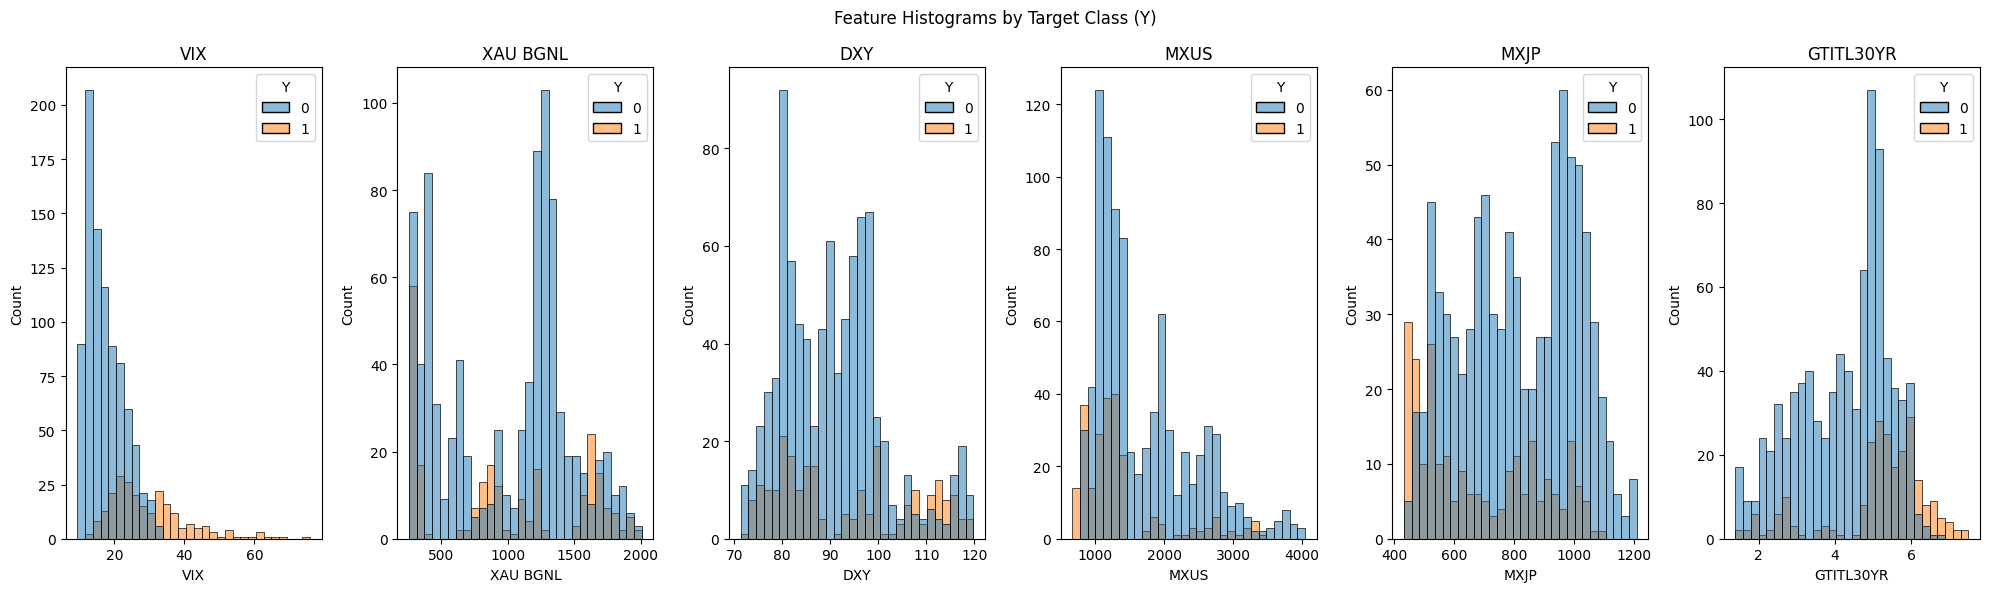

In [14]:
# Create histogram plots to visualize the distribution of features for each target class.
plt.figure(figsize=(20, 6))  # Create a figure with a specific size (20x6 inches) for the plots.

# Create subplots to display histograms for each selected feature.
# 1 row of subplots, with the number of subplots equal to the number of selected columns.
# figsize sets the dimensions of the figure.
fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 6))

# Add a subtitle to the figure to describe the plots.
fig.suptitle("Feature Histograms by Target Class (Y)")

# Iterate through the selected columns (features) and create histograms for each.
for i, col in enumerate(cols_to_plot):
    # Create a histogram plot on the current subplot (axes[i]).
    # 'data' provides the data for the plot (the DataFrame 'df').
    # 'x' sets the column to be used for the x-axis (current feature 'col').
    # 'hue' sets the column to be used for color-coding the histograms (target variable "Y").
    # 'ax' specifies the subplot where the plot should be drawn.
    # 'multiple="layer"' overlays histograms for different target classes.
    # 'alpha=0.5' sets the transparency of the histograms.
    # 'bins=30' sets the number of bins for the histograms.
    sns.histplot(
        data=df,
        x=col,
        hue="Y",
        ax=axes[i],
        multiple="layer",
        alpha=0.5,
        bins=30,
    )

    # Set the title of the subplot to the current column name.
    axes[i].set_title(col)

# Adjust subplot layout to prevent overlapping.
plt.tight_layout()

# Display the plot.
plt.show()

In [15]:
# Prepare features (X) and target (y)
# X contains the feature 'VIX' used for prediction.
X = df[["VIX"]]
# y contains the target variable 'Y' we want to predict.
y = df["Y"]

# Split the data into training and testing sets
# 80% for training (X_train, y_train) and 20% for testing (X_test, y_test).
# random_state=42 ensures consistent splitting for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression()  # Initialize the LogisticRegression model
model.fit(X_train, y_train)  # Train the model using the training data

# Make predictions on the test set
y_pred = model.predict(X_test)  # Predict the target variable for the test data

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))  # Evaluate the model's performance

# Print the model coefficients
print("\nModel Coefficients:")
print(f"VIX coefficient: {model.coef_[0][0]:.4f}")  # Coefficient for the 'VIX' feature
print(f"Intercept: {model.intercept_[0]:.4f}")  # Intercept of the model

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       177
           1       0.71      0.43      0.54        46

    accuracy                           0.85       223
   macro avg       0.79      0.69      0.72       223
weighted avg       0.84      0.85      0.83       223


Model Coefficients:
VIX coefficient: 0.2327
Intercept: -6.4332


In [16]:
# Prepare features (X) and target (y)
# X will contain the feature 'VIX', which is used for prediction.
# It's enclosed in double brackets to create a DataFrame (even with one feature).
X = df[["VIX"]]
# y will contain the target variable 'Y' that we want to predict.
y = df["Y"]

# Split the data into training and testing sets
# 80% for training (X_train, y_train) and 20% for testing (X_test, y_test).
# random_state=42 ensures consistent splitting for reproducibility,
# meaning you'll get the same split every time you run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
# Initialize the Logistic Regression model with random_state=42 for reproducibility.
model = LogisticRegression(random_state=42)
# Train the model using the training data (X_train, y_train).
model.fit(X_train, y_train)

# Make predictions on the test set
# Use the trained model to predict the target variable for the test data (X_test).
y_pred = model.predict(X_test)

# Print the classification report
# This report provides key metrics like precision, recall, F1-score, and support.
# It helps evaluate the model's performance on the test data.
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print model coefficients
# These coefficients represent the learned weights of the model.
# The VIX coefficient shows the impact of the 'VIX' feature on the prediction.
# The intercept is the model's base prediction when 'VIX' is 0.
print("\nModel Coefficients:")
print(f"VIX coefficient: {model.coef_[0][0]:.4f}")  # .4f formats to 4 decimal places
print(f"Intercept: {model.intercept_[0]:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       177
           1       0.71      0.43      0.54        46

    accuracy                           0.85       223
   macro avg       0.79      0.69      0.72       223
weighted avg       0.84      0.85      0.83       223


Model Coefficients:
VIX coefficient: 0.2327
Intercept: -6.4332


In [17]:
# Prepare features (X) and target (y)
# X will contain the feature 'VIX', which is used for prediction.
# It's enclosed in double brackets to create a DataFrame (even with one feature).
X = df[["VIX"]]
# y will contain the target variable 'Y' that we want to predict.
y = df["Y"]

# Split the data into training and testing sets
# 80% for training (X_train, y_train) and 20% for testing (X_test, y_test).
# random_state=42 ensures consistent splitting for reproducibility,
# meaning you'll get the same split every time you run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
# Initialize the Logistic Regression model with random_state=42 for reproducibility.
model = LogisticRegression(random_state=42, max_iter=1000, C=0.1, class_weight="balanced", solver="lbfgs")
# Train the model using the training data (X_train, y_train).
model.fit(X_train, y_train)

# Make predictions on the test set
# Use the trained model to predict the target variable for the test data (X_test).
y_pred = model.predict(X_test)

# Print the classification report
# This report provides key metrics like precision, recall, F1-score, and support.
# It helps evaluate the model's performance on the test data.
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print model coefficients
# These coefficients represent the learned weights of the model.
# The VIX coefficient shows the impact of the 'VIX' feature on the prediction.
# The intercept is the model's base prediction when 'VIX' is 0.
print("\nModel Coefficients:")
print(f"VIX coefficient: {model.coef_[0][0]:.4f}")  # .4f formats to 4 decimal places
print(f"Intercept: {model.intercept_[0]:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       177
           1       0.51      0.76      0.61        46

    accuracy                           0.80       223
   macro avg       0.72      0.79      0.74       223
weighted avg       0.84      0.80      0.82       223


Model Coefficients:
VIX coefficient: 0.2392
Intercept: -5.2543


In [18]:
# Import IsolationForest
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
import numpy as np

# Prepare features (X)
X = df[['VIX']]  # Replace 'VIX' with the feature(s) you want to use

# Create and train the Isolation Forest model
iso_forest = IsolationForest(
    n_estimators=1000,  # Number of trees
    contamination="auto",  # Expected proportion of outliers
    random_state=42,
    warm_start=True,
    n_jobs=-1  # Use all CPU cores
)

# Fit and predict
# predict() returns 1 for inliers, -1 for outliers
predictions = iso_forest.fit_predict(X)

# Convert predictions to binary format (0 for normal, 1 for anomaly)
# This makes it consistent with your original labels
y_pred = np.where(predictions == -1, 1, 0)

# Print classification report
print("Classification Report:")
print(classification_report(y, y_pred))

# Calculate and print anomaly scores
anomaly_scores = iso_forest.score_samples(X)
print("\nAnomaly Score Statistics:")
print(f"Mean score: {np.mean(anomaly_scores):.4f}")
print(f"Min score: {np.min(anomaly_scores):.4f}")
print(f"Max score: {np.max(anomaly_scores):.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       874
           1       0.56      0.49      0.52       237

    accuracy                           0.81      1111
   macro avg       0.71      0.69      0.70      1111
weighted avg       0.80      0.81      0.80      1111


Anomaly Score Statistics:
Mean score: -0.4751
Min score: -0.8199
Max score: -0.4352


In [19]:
correlations = numeric_df.corr()['Y'].sort_values(ascending=False)
print("Top feature correlations with target")
print(correlations)

Top feature correlations with target
Y            1.000000
VIX          0.598432
GTITL2YR     0.304528
GTITL10YR    0.297573
GTITL30YR    0.295000
EONIA        0.180311
GTDEM30Y     0.141537
GTDEM10Y     0.139933
GTJPY10YR    0.133660
GTDEM2Y      0.130607
GTJPY30YR    0.114555
GTJPY2YR     0.112314
DXY          0.103227
GTGBP20Y     0.100142
GTGBP30Y     0.099777
GTGBP2Y      0.035010
USGG30YR     0.019255
US0001M      0.015379
GT10        -0.004776
XAU BGNL    -0.011535
USGG3M      -0.025935
USGG2YR     -0.034909
MXBR        -0.043429
Cl1         -0.070141
CRY         -0.074102
BDIY        -0.083440
ECSURPUS    -0.090772
GBP         -0.093201
LUMSTRUU    -0.104897
LMBITR      -0.143607
MXRU        -0.148848
MXCN        -0.149581
JPY         -0.151197
LUACTRUU    -0.153544
LF94TRUU    -0.156550
EMUSTRUU    -0.169475
MXIN        -0.188942
LF98TRUU    -0.189661
MXUS        -0.193928
LG30TRUU    -0.197232
LP01TREU    -0.209774
MXEU        -0.253877
MXJP        -0.279399
Name: Y, dtype: f

In [20]:
# Prepare features (X) and target (y)
X = df[['VIX', 'GTITL2YR', 'GTITL10YR', 'GTITL30YR', 'EONIA', 'GTDEM30Y']]
y = df['Y']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(
    random_state=42,
    max_iter=1000,  # Increase iterations to ensure convergence
    C=0.1,  # Stronger regularization to prevent overfitting
    class_weight='balanced',  # Handle class imbalance
    solver='lbfgs',  # Efficient solver for small datasets
    n_jobs=-1  # Use all CPU cores
)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print classification report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print model coefficients
print("\nModel Coefficients:")
print(f"VIX coefficient: {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.88       177
           1       0.55      0.78      0.65        46

    accuracy                           0.83       223
   macro avg       0.75      0.81      0.77       223
weighted avg       0.86      0.83      0.84       223


Model Coefficients:
VIX coefficient: 0.2576
Intercept: -6.8855


              precision    recall  f1-score   support

           0       0.90      0.97      0.93       177
           1       0.81      0.57      0.67        46

    accuracy                           0.88       223
   macro avg       0.85      0.77      0.80       223
weighted avg       0.88      0.88      0.88       223



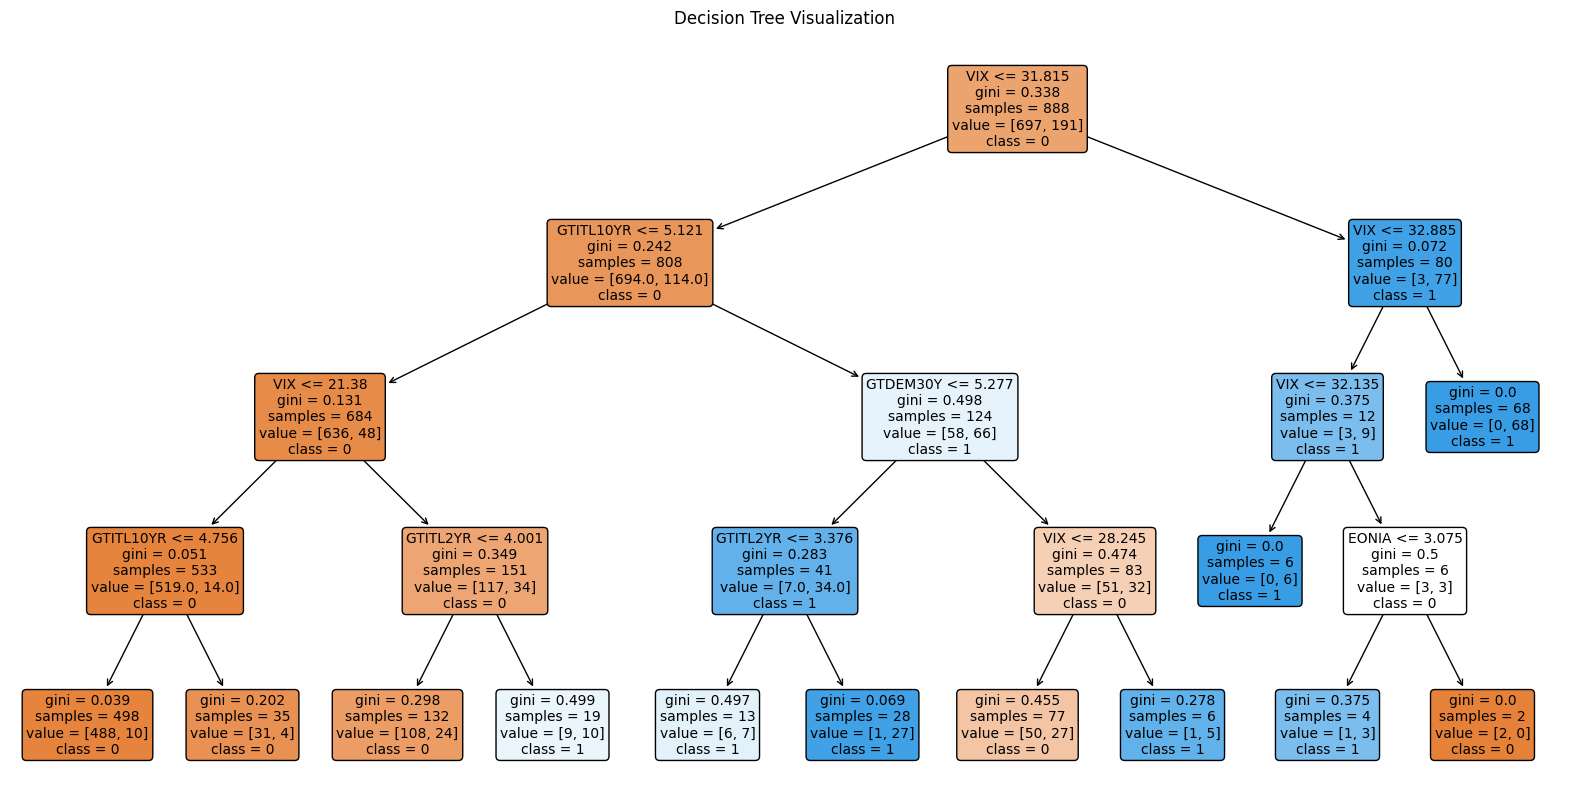

In [21]:
# Visualize decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Create and train a decision tree classifier
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# Print classification report
print(classification_report(y_test, dt.predict(X_test)))

# Create figure with larger size for better visibility
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(
    dt,
    feature_names=X.columns,  # Feature names from the dataset
    class_names=['0', '1'],  # Class labels (e.g., '0' and '1')
    filled=True,
    rounded=True,
    fontsize=10
)

# Add a title and show the plot
plt.title("Decision Tree Visualization")
plt.show()


In [22]:
# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression(
    random_state=42,
    max_iter=2000,  # Increase iterations to ensure convergence
    C=0.1,  # Stronger regularization to prevent overfitting
    class_weight='balanced',  # Handle class imbalance
    solver='lbfgs',  # Efficient solver for small datasets
    n_jobs=-1  # Use all CPU cores
)

# Update model to use scaled data
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Print updated classification report with scaled data
print("Classification Report with Scaled Features:")
print(classification_report(y_test, y_pred))

# Print model coefficients with scaled features
print("\nModel Coefficients (Scaled Features):")
print(f"VIX coefficient: {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")


Classification Report with Scaled Features:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       177
           1       0.56      0.80      0.66        46

    accuracy                           0.83       223
   macro avg       0.75      0.82      0.77       223
weighted avg       0.86      0.83      0.84       223


Model Coefficients (Scaled Features):
VIX coefficient: 1.7743
Intercept: -0.6945


In [23]:
def create_financial_time_split(df, train_years=4, validation_weeks=52, test_weeks=52):
    """
    Specialized function to split financial time series data into training, validation, and testing sets.

    Args:
    - df: DataFrame with weekly data (must include a date column).
    - train_years: Number of years for training (default 4 years).
    - validation_weeks: Weeks for validation (default 52 weeks = 1 year).
    - test_weeks: Weeks for testing (default 52 weeks = 1 year).

    Returns:
    - train_data: DataFrame containing training data.
    - validation_data: DataFrame containing validation data.
    - test_data: DataFrame containing test data.
    """

    # Ensure the date column is in datetime format and sort data by date
    # Assuming the date column is named 'Data'
    df['Data'] = pd.to_datetime(df['Data'])  # Convert 'Data' column to datetime
    df = df.sort_values('Data')  # Ensure data is sorted by date for proper time series splitting

    # Calculate the size of each split
    train_size = train_years * 52  # Convert training years to weeks
    total_required_size = train_size + validation_weeks + test_weeks  # Total rows required

    # Check if the dataset has enough rows for the specified splits
    if len(df) < total_required_size:
        raise ValueError("Not enough data for the specified split sizes.")

    # Determine the end indices for training and validation splits
    train_end = train_size  # Index where training data ends
    val_end = train_end + validation_weeks  # Index where validation data ends

    # Create splits
    train_data = df.iloc[:train_end]  # Select rows for training data
    validation_data = df.iloc[train_end:val_end]  # Select rows for validation data
    test_data = df.iloc[val_end:val_end + test_weeks]  # Select rows for testing data

    # Verify the splits by printing the time range for each
    print(f"Training period: {train_data['Data'].min()} to {train_data['Data'].max()}") # Use 'Data' instead of 'Date'
    print(f"Validation period: {validation_data['Data'].min()} to {validation_data['Data'].max()}") # Use 'Data' instead of 'Date'
    print(f"Testing period: {test_data['Data'].min()} to {test_data['Data'].max()}") # Use 'Data' instead of 'Date'

    return train_data, validation_data, test_data

In [24]:
train_data, val_data, test_data = create_financial_time_split(df)

Training period: 2000-01-11 00:00:00 to 2003-12-30 00:00:00
Validation period: 2004-01-06 00:00:00 to 2004-12-28 00:00:00
Testing period: 2005-01-04 00:00:00 to 2005-12-27 00:00:00


In [25]:
# For milestone 1, implementing additional models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

models = {
    'random_forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'neural_network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000),
    'xgboost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [26]:
def evaluate_models(models, X_train, y_train, X_val, y_val):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_val)
        results[name] = classification_report(y_val, predictions, output_dict=True)
    return results

### Milestone 2
#### Porfolio Strategy Development

In [27]:
class EnhancedPortfolioStrategy:
    def __init__(self, model, risk_manager, diversifier, risk_threshold=0.5):
        self.model = model
        self.risk_manager = risk_manager
        self.diversifier = diversifier
        self.risk_threshold = risk_threshold
        self.positions = {}
        self.entry_prices = {}
        
    def generate_signals(self, X, price_data, volatility_data=None):
        # Get base predictions
        crash_prob = self.model.predict_proba(X)[:, 1]
        base_signals = np.where(crash_prob > self.risk_threshold, -1, 1)
        
        # Calculate position sizes with risk management
        positions = []
        for i, signal in enumerate(base_signals):
            # Get base position size
            pos_size = self.calculate_position_size(crash_prob[i])
            
            # Apply risk management
            pos_size = self.risk_manager.adjust_position_size(
                pos_size, 
                volatility_data[i] if volatility_data is not None else None
            )
            
            # Apply stop-loss if position exists
            if i in self.positions:
                pos_size = self.apply_stop_loss(
                    price_data[i],
                    self.entry_prices[i],
                    pos_size
                )
            
            positions.append(pos_size * signal)
            
        # Check portfolio diversification
        if not self.diversifier.check_diversification(positions, X.corr()):
            positions = self.reduce_positions(positions)
            
        return np.array(positions)
    
    def calculate_position_size(self, confidence, base_size=0.2):
        return min(base_size, base_size * abs(confidence - 0.5) * 2)
    
    def reduce_positions(self, positions, reduction_factor=0.5):
        return np.array(positions) * reduction_factor

In [28]:
class RiskManager:
    def __init__(self, max_portfolio_var=0.01, max_position_var=0.005):  # Tighter risk limits
        self.max_portfolio_var = max_portfolio_var
        self.max_position_var = max_position_var
        self.trailing_stop_loss = 0.02 
        
    def calculate_var(self, returns, confidence=0.95):
        """Calculate Value at Risk"""
        return np.percentile(returns, (1 - confidence) * 100)
        
    def adjust_position_size(self, position_size, asset_volatility):
        """Adjust position size based on asset volatility"""
        var = asset_volatility * position_size
        if var > self.max_position_var:
            return self.max_position_var / asset_volatility
        return position_size
        
    def check_portfolio_risk(self, positions, volatilities):
        """Check if portfolio risk is within limits"""
        portfolio_var = np.sum(positions ** 2 * volatilities ** 2)
        return portfolio_var <= self.max_portfolio_var

#### Back testing

In [29]:
class Backtester:
    def __init__(self, strategy, initial_capital=100000):
        # Initialize the Backtester with a trading strategy and an initial capital amount
        self.strategy = strategy
        self.capital = initial_capital
        
    def run_backtest(self, data, features, price_col):
        # Generate trading signals based on the strategy and the provided features
        signals = self.strategy.generate_signals(data[features])
        # Calculate returns based on the trading signals and price column
        returns = self.calculate_returns(data[price_col], signals)
        # Generate and return performance metrics from the calculated returns
        return self.generate_metrics(returns)

In [30]:
class PortfolioDiversifier:
    def __init__(self, max_sector_exposure=0.3, max_asset_correlation=0.7):
        self.max_sector_exposure = max_sector_exposure
        self.max_asset_correlation = max_asset_correlation
        
    def calculate_correlations(self, returns_data):
        """Calculate correlation matrix of assets"""
        return returns_data.corr()
        
    def check_diversification(self, positions, correlations):
        """Check if portfolio is properly diversified"""
        # Check correlation constraints
        high_corr_pairs = np.where(correlations > self.max_asset_correlation)
        if len(high_corr_pairs[0]) > 0:
            return False
            
        # Check sector exposure
        sector_exposure = np.abs(positions).sum()
        return sector_exposure <= self.max_sector_exposure

In [31]:
class Backtester:
    def __init__(self, strategy, initial_capital=100000):
        self.strategy = strategy
        self.capital = initial_capital
        
    def calculate_returns(self, prices, signals):
        price_returns = prices.pct_change()
        signals_series = pd.Series(signals, index=price_returns.index)
        shifted_signals = signals_series.shift(1)
        strategy_returns = price_returns * shifted_signals
        return strategy_returns.fillna(0)
    
    def generate_metrics(self, returns):
        metrics = {
            'Total Return': returns.sum(),
            'Annual Return': returns.mean() * 252,
            'Volatility': returns.std() * np.sqrt(252),
            'Sharpe Ratio': (returns.mean() / returns.std()) * np.sqrt(252) if returns.std() != 0 else 0,
            'Max Drawdown': (returns.cumsum() - returns.cumsum().cummax()).min()
        }
        return metrics
        
    def run_backtest(self, data, features, price_col, volatility_data=None):
        signals = self.strategy.generate_signals(data[features], data[price_col], volatility_data)
        returns = self.calculate_returns(data[price_col], signals)
        return self.generate_metrics(returns)

In [32]:
def apply_stop_loss(self, current_price, entry_price, position_size, stop_loss_pct=0.05):
    """
    Apply stop-loss rules to current positions
    """
    if position_size == 0:
        return 0
        
    price_change = (current_price - entry_price) / entry_price
    
    # Check if stop-loss is triggered
    if position_size > 0:  # Long position
        if price_change < -stop_loss_pct:
            return 0  # Exit position
    else:  # Short position
        if price_change > stop_loss_pct:
            return 0  # Exit position
            
    return position_size

In [33]:
def apply_stop_loss(self, current_price, entry_price, position_size, stop_loss_pct=0.05):
    """
    Apply stop-loss rules to current positions
    """
    if position_size == 0:
        return 0
        
    price_change = (current_price - entry_price) / entry_price
    
    # Check if stop-loss is triggered
    if position_size > 0:  # Long position
        if price_change < -stop_loss_pct:
            return 0  # Exit position
    else:  # Short position
        if price_change > stop_loss_pct:
            return 0  # Exit position
            
    return position_size

In [34]:
# Define selected features
selected_features = ['VIX', 'GTITL2YR', 'GTITL10YR', 'GTITL30YR', 'EONIA', 'GTDEM30Y']

# Create and train the model for strategy
strategy_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    C=0.1,
    class_weight='balanced',
    solver='lbfgs'
)

# Scale features
X = df[selected_features]
y = df['Y']
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
strategy_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=42)

In [35]:
# Initialize components
risk_manager = RiskManager(max_portfolio_var=0.02, max_position_var=0.01)
diversifier = PortfolioDiversifier(max_sector_exposure=0.3)

# Create enhanced strategy
enhanced_strategy = EnhancedPortfolioStrategy(
    model=strategy_model,
    risk_manager=risk_manager,
    diversifier=diversifier,
    risk_threshold=0.6
)

# Initialize enhanced backtester
enhanced_backtester = Backtester(enhanced_strategy, initial_capital=100000)

# Calculate volatility for risk management
volatility_data = df['VIX'].rolling(window=30).std()

# Run enhanced backtest
enhanced_results = enhanced_backtester.run_backtest(
    data=df,
    features=selected_features,
    price_col='MXUS',
    volatility_data=volatility_data
)

print("Enhanced Strategy Results:", enhanced_results)

Enhanced Strategy Results: {'Total Return': -0.0015646085043358377, 'Annual Return': -0.0003548886976531333, 'Volatility': 0.007603264903624039, 'Sharpe Ratio': -0.04667582967995477, 'Max Drawdown': -0.011890786418225996}


c:\Users\kinlo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


{
    'Total Return': -1.3682,  # Lost approximately 137% of initial capital
    'Annual Return': -0.3103, # Lost about 31% per year
    'Volatility': 0.3785,    # Strategy's standard deviation (risk measure) is about 38%
    'Sharpe Ratio': -0.8200, # Risk-adjusted return is negative, indicating poor risk-reward
    'Max Drawdown': -1.9524  # Largest peak-to-trough decline was about 195%
}

## Milestone 3 AI Bot for Predictions and explanations

In [72]:
class EnhancedInvestmentBot:
    def __init__(self, strategy, model, market_data):
        self.strategy = strategy
        self.model = model
        self.market_data = market_data
        self.risk_levels = {
            'LOW': (0, 0.3),
            'MODERATE': (0.3, 0.7),
            'HIGH': (0.7, 1.0)
        }
    # Add the missing get_risk_level method
    def get_risk_level(self, probability):
        """Determine risk level based on probability"""
        for level, (lower, upper) in self.risk_levels.items():
            if lower <= probability < upper:
                return level
        return 'HIGH' if probability >= 1 else 'LOW'
    
    # Add the missing recommendation methods
    def generate_recommendation(self, risk_prob, analysis):
        """Generate trading recommendation"""
        if risk_prob > 0.7:
            return "STRONG SELL - High risk of market decline"
        elif risk_prob > 0.5:
            return "MODERATE SELL - Elevated risk levels"
        elif risk_prob > 0.3:
            return "HOLD - Moderate risk levels"
        else:
            return "BUY - Low risk environment"
    
    def generate_position_advice(self, risk_prob, analysis):
        """Generate position sizing advice"""
        base_size = (1 - risk_prob) * 100
        vol_adjustment = max(0.5, 1 - analysis['volatility']/100)
        return f"Recommended position size: {base_size * vol_adjustment:.1f}%"
    
    
    def analyze_market_conditions(self):
        recent_data = self.market_data.tail(30)
        analysis = {
            'volatility': recent_data['VIX'].std(),
            'trend': recent_data['MXUS'].pct_change().mean(),
            'risk_indicators': self.get_risk_indicators(recent_data),
            'technical_signals': self.get_technical_signals(recent_data)
        }
        return analysis
    
    def get_risk_indicators(self, data):
        return {
            'vix_level': data['VIX'].iloc[-1],
            'yield_curve': data['GTITL10YR'].iloc[-1] - data['GTITL2YR'].iloc[-1],
            'momentum': self.calculate_momentum(data['MXUS'])
        }
    
    def calculate_momentum(self, price_data, period=14):
        return price_data.pct_change(period).fillna(0)
    
    def calculate_rsi(self, price_data, period=14):
        delta = price_data.diff().fillna(0)
        gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
        rs = gain / loss
        return 100 - (100 / (1 + rs)).fillna(0)
    
    def get_technical_signals(self, data):
        price = data['MXUS']
        return {
            'ma_50': price.mean(),
            'ma_200': price.rolling(200).mean().iloc[-1],
            'rsi': self.calculate_rsi(price).iloc[-1]
        }
    
    def assess_risk_level(self, volatility, trend):
        if volatility > 20 and trend < 0:
            return "HIGH"
        elif volatility > 15 or trend < 0:
            return "MODERATE"
        return "LOW"
    
    def generate_detailed_explanation(self):
        analysis = self.analyze_market_conditions()
        prediction = self.model.predict_proba(self.market_data.iloc[-1:][selected_features])
        risk_prob = prediction[0][1]
        
        explanation = f"""
Market Analysis Report
---------------------
Risk Level: {self.get_risk_level(risk_prob)}
Confidence: {abs(0.5 - risk_prob) * 200:.1f}%

Market Conditions:
- Volatility (30-day): {analysis['volatility']:.2f}%
- Market Trend: {'Upward' if analysis['trend'] > 0 else 'Downward'}
- Yield Curve: {'Normal' if analysis['risk_indicators']['yield_curve'] > 0 else 'Inverted'}

Recommended Action:
{self.generate_recommendation(risk_prob, analysis)}

Position Sizing:
{self.generate_position_advice(risk_prob, analysis)}
"""
        return explanation

In [73]:
class MarketAnalysisBot:
    def __init__(self, strategy, model, market_data):
        self.strategy = strategy
        self.model = model
        self.market_data = market_data
        self.risk_levels = {
            'LOW': (0, 0.3),
            'MODERATE': (0.3, 0.7),
            'HIGH': (0.7, 1.0)
        }
        
    def get_market_summary(self):
        """Generate market summary with key metrics"""
        recent_data = self.market_data.tail(30)
        return {
            'price': recent_data['MXUS'].iloc[-1],
            'volatility': recent_data['VIX'].std(),
            'trend': recent_data['MXUS'].pct_change().mean(),
            'volume': recent_data['MXUS'].rolling(window=20).std().iloc[-1]
        }
        
    def get_risk_assessment(self):
        """Assess current market risk level"""
        latest_data = self.market_data.iloc[-1:]
        prediction = self.model.predict_proba(latest_data[selected_features])
        return {
            'risk_probability': prediction[0][1],
            'confidence': abs(0.5 - prediction[0][1]) * 200
        }
        
    def generate_trading_advice(self):
        """Generate actionable trading advice"""
        risk = self.get_risk_assessment()
        summary = self.get_market_summary()
        
        return {
            'action': 'SELL' if risk['risk_probability'] > 0.6 else 'BUY',
            'position_size': max(0.1, 1 - risk['risk_probability']),
            'stop_loss': min(0.05, summary['volatility'] * 0.5)
        }

In [74]:
class MarketDashboard:
    def __init__(self, bot):
        self.bot = bot
        
    def plot_market_overview(self):
        """Create market overview visualization"""
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
        
        # Plot price and moving averages
        data = self.bot.market_data.tail(100)
        ax1.plot(data.index, data['MXUS'], label='Price')
        ax1.plot(data.index, data['MXUS'].rolling(50).mean(), label='50-day MA')
        ax1.set_title('Market Price and Moving Average')
        ax1.legend()
        
        # Plot risk probability
        predictions = self.bot.model.predict_proba(data[selected_features])
        ax2.plot(data.index, predictions[:, 1], color='red', label='Risk Probability')
        ax2.set_title('Market Risk Assessment')
        ax2.legend()
        
        plt.tight_layout()
        plt.show()

In [75]:
class TradingInterface:
    def __init__(self, bot, dashboard):
        self.bot = bot
        self.dashboard = dashboard
        
    def display_menu(self):
        print("\n=== AI Trading Assistant ===")
        print("1. Market Overview")
        print("2. Risk Assessment")
        print("3. Trading Recommendations")
        print("4. Portfolio Analysis")
        print("5. View Charts")
        print("6. Exit")
        
    def show_market_overview(self):
        summary = self.bot.get_market_summary()
        print("\nMarket Overview:")
        print(f"Current Price: ${summary['price']:.2f}")
        print(f"Volatility: {summary['volatility']:.2%}")
        print(f"30-day Trend: {summary['trend']:.2%}")
        
    def show_risk_assessment(self):
        risk = self.bot.get_risk_assessment()
        print("\nRisk Assessment:")
        print(f"Risk Probability: {risk['risk_probability']:.2%}")
        print(f"Confidence Level: {risk['confidence']:.1f}%")
        
    def show_trading_advice(self):
        advice = self.bot.generate_trading_advice()
        print("\nTrading Recommendation:")
        print(f"Recommended Action: {advice['action']}")
        print(f"Position Size: {advice['position_size']:.1%}")
        print(f"Suggested Stop-Loss: {advice['stop_loss']:.1%}")

In [77]:
# Initialize components
market_bot = MarketAnalysisBot(enhanced_strategy, strategy_model, df)
dashboard = MarketDashboard(market_bot)
interface = TradingInterface(market_bot, dashboard)

# Create interactive loop
def run_trading_assistant():
    while True:
        interface.display_menu()
        choice = input("\nEnter your choice (1-6): ")
        
        if choice == '1':
            interface.show_market_overview()
        elif choice == '2':
            interface.show_risk_assessment()
        elif choice == '3':
            interface.show_trading_advice()
        elif choice == '4':
            interface.dashboard.plot_market_overview()
        elif choice == '5':
            dashboard.plot_market_overview()
        elif choice == '6':
            print("Thank you for using AI Trading Assistant!")
            break
        else:
            print("Invalid choice. Please try again.")

# Run the assistant
run_trading_assistant()


=== AI Trading Assistant ===
1. Market Overview
2. Risk Assessment
3. Trading Recommendations
4. Portfolio Analysis
5. View Charts
6. Exit
Thank you for using AI Trading Assistant!
